# Hola Elpidio! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">

<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo en la primera parte, pero veo que no has desarrollado nada para las siguientes secciones. Por favor envialo completo, si tienes dudas de las secciones me las puedes dejar en recuadros azules y las responderé en la siguiente revisión.
    
Saludos!    

</div>

## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Bien hecho con las partes que agregaste, están muy bien, salvo donde calculaste el revenue pero se pide la cantidad de pedidos. Para las conclusiones que preguntas al final del notebook, debes continuar el desarrollo para llegar a calcular el gasto de adquisición de usuarios y el retorno de inversión para cada fuente, con esto podrás responder las preguntas.
    
Saludos!    

</div>

## Resumen de la revisión 4 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Muy buen avance Elpidio. Ahora tan solo falta corregir el cálculo del CAC y el ROMI. Te dejé comentarios detallados acerca de cómo completar el cálculo de esas métricas.
    
Saludos!

</div>

# Proposito del proyecto

Es hacer un analisis de la empresa de venta de entradas de eventos. 

Mi tarea es ayudar a optimizar los gastos de marketing. 

# Iniciacion

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import sidetable as stb

In [2]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.


## 1.2 Cargar datos

In [3]:

visitor_raw = pd.read_csv("visits_log_us.csv")
orders_raw = pd.read_csv("orders_log_us.csv")
cost_raw = pd.read_csv("costs_us.csv")

#/datasets/

## 1.3 Preparar los datos

In [4]:
def info_gral(datos):
    print("------Primeras Filas------")
    print(datos.head())
    print()
    print("------Datos Generales------")
    print(datos.info())
    print()
    print("------Revision de Datos Ausentes------")
    print(datos.isna().sum())
    print()
    print("------Revision de Duplicados------")
    print(datos.duplicated().sum())
    print()
    print("------Valores Faltantes------")
    print(datos.stb.missing())

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, bien al crear una función que nos dará qué contienen los dataframes

</div>

## 1.4 Limpieza de Datos

In [5]:
info_gral(visitor_raw)

------Primeras Filas------
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

------Datos Generales------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  ui

In [6]:
#los titulos de las columna las convertimos en minusculas y remplazamos ('espacios' , '_')
visitor_raw.columns = visitor_raw.columns.str.lower().str.replace(' ', '_')

#cambiamos a formato de datetime
visitor_raw['end_ts']=pd.to_datetime(visitor_raw['end_ts'])
visitor_raw['start_ts']=pd.to_datetime(visitor_raw['start_ts'])

In [7]:
info_gral(orders_raw)

------Primeras Filas------
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

------Datos Generales------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

------Revision de Datos Ausentes------
Buy Ts     0
Revenue    0
Uid        0
dtype: int64

------Revision de Duplicados------
0

------Valores Faltantes------
         missing  total  percent
Buy Ts         0  50415      0.0
Revenue        0  50415    

In [8]:
#los titulos de las columna las convertimos en minusculas y remplazamos ('espacios' , '_')
orders_raw.columns = orders_raw.columns.str.lower().str.replace(' ', '_')

#cambiamos a formato de datetime
orders_raw['buy_ts']=pd.to_datetime(orders_raw['buy_ts'])


In [9]:
info_gral(cost_raw)

------Primeras Filas------
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

------Datos Generales------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

------Revision de Datos Ausentes------
source_id    0
dt           0
costs        0
dtype: int64

------Revision de Duplicados------
0

------Valores Faltantes------
           missing  total  percent
source_id        0   2542      0.0
dt               0   2542      0.0
costs            0   2542      0.0


In [10]:
#cambiamos a formato de datetime

cost_raw['dt']=pd.to_datetime(cost_raw['dt'])


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien al transformar las columnas snakecase y cambiar las fechas a datetime

</div>

# 1.5 Informes y calcula métricas

In [11]:
visitor_raw.value_counts('device')

device
desktop    262567
touch       96833
Name: count, dtype: int64

### Mayor visitas son las computadoras.

In [12]:
visitor_raw.value_counts('source_id').sort_values(ascending=False)

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: count, dtype: int64

Nos damos cuenta que la fuente que tiene mas visitas es la #4 

In [13]:
print("Inicio de Sesion", visitor_raw['start_ts'].min(), visitor_raw['start_ts'].max())
print("Fin de Sesion", visitor_raw['end_ts'].min(), visitor_raw['end_ts'].max())

Inicio de Sesion 2017-06-01 00:01:00 2018-05-31 23:59:00
Fin de Sesion 2017-06-01 00:02:00 2018-06-01 01:26:00


Aqui mostramos el inicio de seccion la fecha minima y la fecha maxima

In [14]:
print("Fecha de compra Min y Max", orders_raw['buy_ts'].min(), orders_raw['buy_ts'].max())

Fecha de compra Min y Max 2017-06-01 00:10:00 2018-06-01 00:02:00


primera orden de compra y la ultima orden de compra

In [15]:
print("Fecha de Gastos Min y Max", cost_raw['dt'].min(), cost_raw['dt'].max())


Fecha de Gastos Min y Max 2017-06-01 00:00:00 2018-05-31 00:00:00


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con esta exploración de los datos, nos da una idea de lo que contienen

</div>

## Visitas
### Cuantas personas entraron a la web en temporalidad diaria, semanal y mensual

In [16]:
visitor_raw['sesion_mes']=visitor_raw['start_ts'].apply(lambda fecha: pd.to_datetime(fecha.strftime('%Y-%m-%01')))
visitor_raw['sesion_mes_anio']=visitor_raw['start_ts'].dt.strftime('%Y-%m')
visitor_raw['sesion_semana']=visitor_raw['start_ts'].dt.isocalendar().week
visitor_raw['sesion_semana_anio']=visitor_raw['start_ts'].dt.strftime('%Y-%U')
visitor_raw['sesion_dia']=visitor_raw['start_ts'].dt.date
visitor_raw.head()


,device,end_ts,source_id,start_ts,uid,sesion_mes,sesion_mes_anio,sesion_semana,sesion_semana_anio,sesion_dia
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12,51,2017-51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02,8,2018-07,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07,26,2017-26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05,20,2018-20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12,52,2017-52,2017-12-27


In [17]:
users_day= visitor_raw.groupby('sesion_dia')['uid'].nunique()
user_week = visitor_raw.groupby('sesion_semana_anio')['uid'].nunique()
user_month = visitor_raw.groupby('sesion_mes_anio')['uid'].nunique()

In [18]:
print('DAU - Day Average User :', int(users_day.mean()), 'visitors in 2017-2018')
print('WAU - Week Average User:', int(user_week.mean()), 'visitors in 2017-2018')
print('MAU - Month Average User:', int(user_month.mean()), 'visitors in 2017-2018')

DAU - Day Average User : 907 visitors in 2017-2018
WAU - Week Average User: 5612 visitors in 2017-2018
MAU - Month Average User: 23228 visitors in 2017-2018


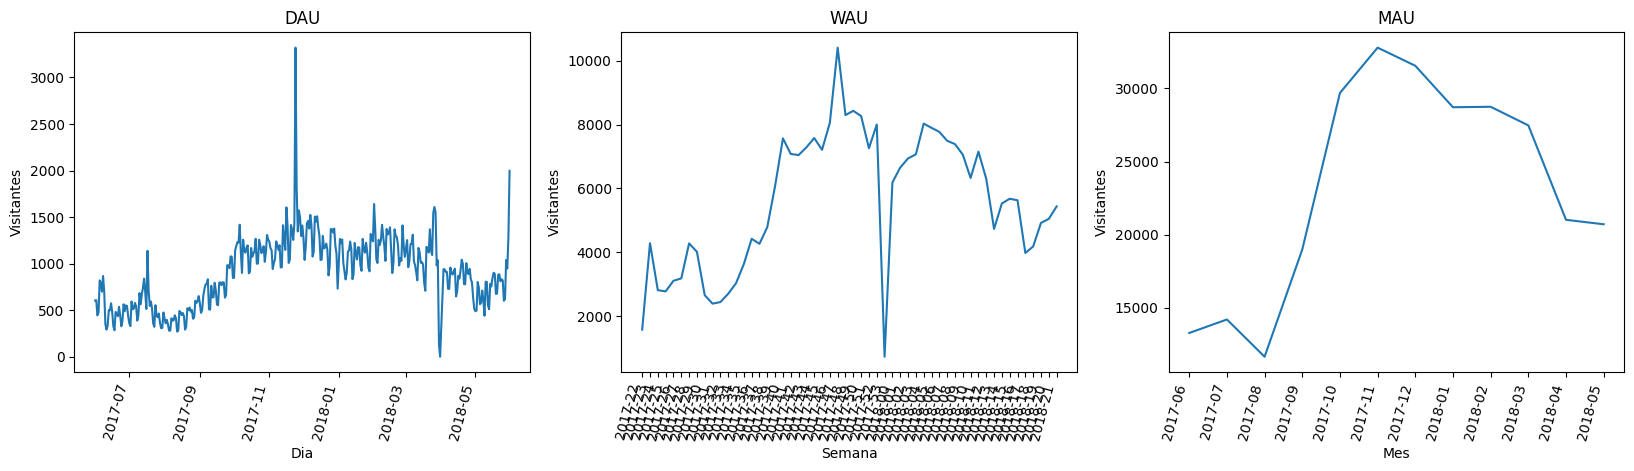

In [19]:
fig, ax =plt.subplots(1,3, figsize=(20,5))
ax[0].plot(users_day)
ax[0].set(title='DAU',xlabel='Dia', ylabel='Visitantes')

ax[1].plot(user_week)
ax[1].set(title='WAU', xlabel='Semana', ylabel= 'Visitantes')

ax[2].plot(user_month)
ax[2].set(title='MAU', xlabel='Mes', ylabel= 'Visitantes')

fig.autofmt_xdate(rotation=75)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien con los gráficos que muestran el comportamietno de cada variable a lo largo del tiempo. Lo único que me llama la atención es la caida de los usuarios en la mitad del gráfico semanal. Probablemente esto se debe a que el 2017 termina con una semana de menos días.

</div>

### ¿Cuántas sesiones hay por día/usuario? (Un usuario puede tener más de una sesión).

In [20]:
session_per_user = visitor_raw.groupby('sesion_dia').agg({'uid':['count','nunique' ]})

session_per_user.columns = ['num_sesiones', 'num_usuarios']


In [21]:
session_per_user['sesiones_por_usuarios']= session_per_user['num_sesiones'] / session_per_user['num_usuarios']
session_per_user

,num_sesiones,num_usuarios,sesiones_por_usuarios
sesion_dia,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


[Text(0.5, 1.0, 'Session por Usuario'),
 Text(0.5, 0, 'Dia'),
 Text(0, 0.5, 'Sesiones')]

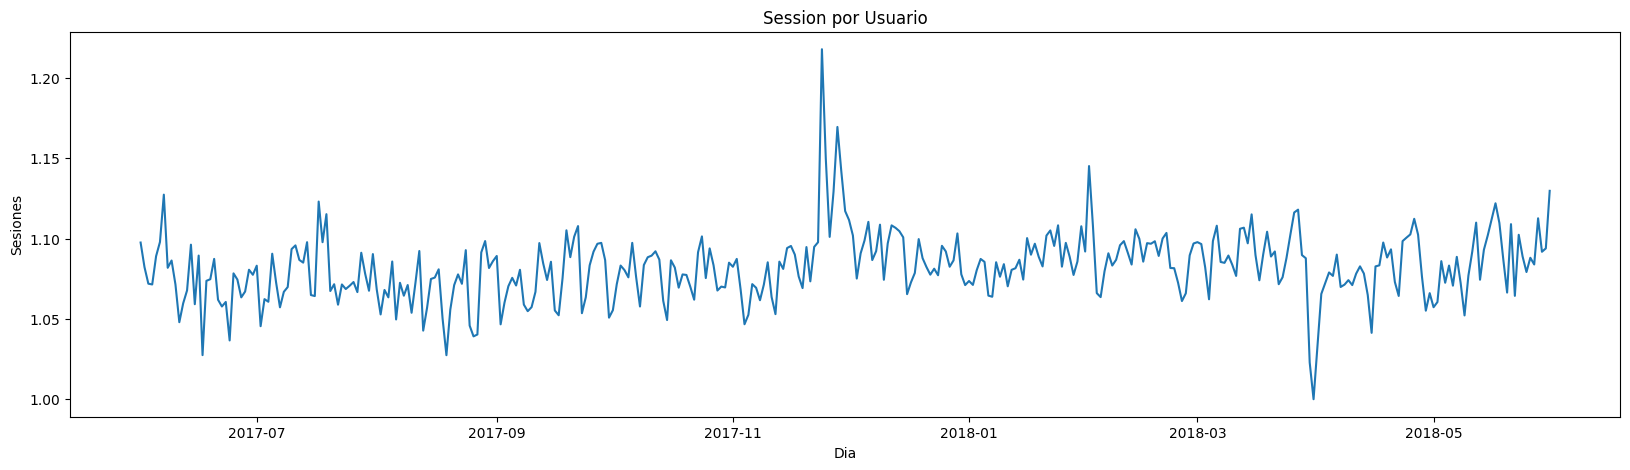

In [22]:
plt.figure(figsize=(20,5))

session_per_user['sesiones_por_usuarios'].plot().set(title='Session por Usuario', xlabel='Dia', ylabel= 'Sesiones')

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo, mostrar la proporción de sesiones por usuario nos da la idea de que cómo se diferencian estas dos métricas. Queda claro que es más o menos constante en el rango de 1.05 a 1.15, por lo que casi siempre un usuario visita el sitio una vez al día.

</div>

### ¿Cuál es la duración de cada sesión?

In [23]:
print('El promedio por usuario es: {}'.format(round(session_per_user['sesiones_por_usuarios'].mean(),3)))

El promedio por usuario es: 1.082


In [24]:
visitor_raw['duracion_sesion_seg']= (visitor_raw['end_ts']-visitor_raw['start_ts']).dt.seconds
visitor_raw['duracion_sesion_seg'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duracion_sesion_seg, dtype: float64

[Text(0.5, 1.0, 'Duracion de la sesion en segundos'),
 Text(0.5, 0, 'visitantes que tienen el mismo tiempo'),
 Text(0, 0.5, 'Segundos')]

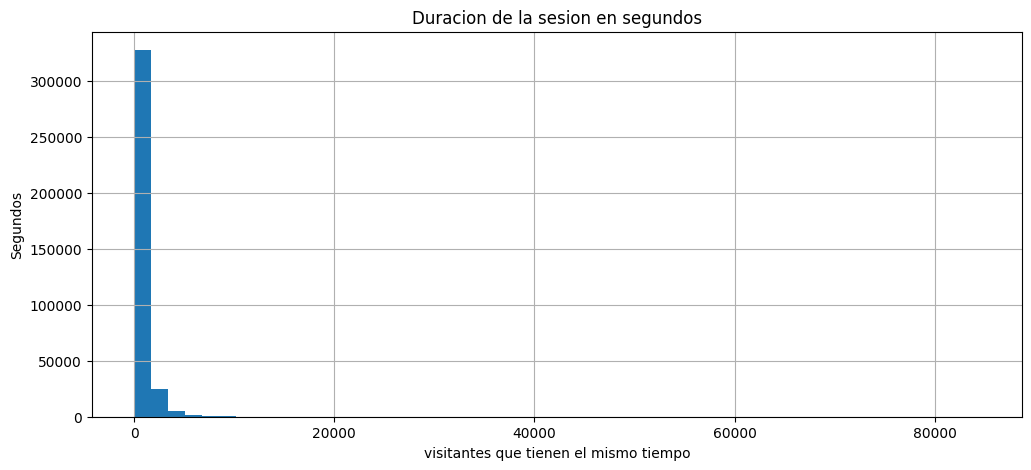

In [25]:
plt.figure(figsize=(12,5))
visitor_raw['duracion_sesion_seg'].hist(bins=50).set(title='Duracion de la sesion en segundos',xlabel='visitantes que tienen el mismo tiempo', ylabel= 'Segundos')

In [26]:
print(f"La moda de la duracion es: {visitor_raw['duracion_sesion_seg'].mode()}")

print(f"La media de la duracion es : {visitor_raw['duracion_sesion_seg'].mean()}")


La moda de la duracion es: 0    60
Name: duracion_sesion_seg, dtype: int32
La media de la duracion es : 643.506488592098


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, el histograma muestra cómo distribuye esta duración. Dado que está muy cargado a valores pequeños, la moda y media son útiles para dimensionar dónde se concentran o qué valor es representativo.

</div>


### ¿Con qué frecuencia los usuarios regresan?

In [27]:

primeras_visitas = visitor_raw.groupby('uid')['start_ts'].min().reset_index()
primeras_visitas.columns = ['uid','inicio_ts_primera_sesion']
primeras_visitas.head()

,uid,inicio_ts_primera_sesion
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [28]:
primeras_visitas ['primera_sesion_dias'] = primeras_visitas ['inicio_ts_primera_sesion'].dt.date
primeras_visitas ['primera_sesion_mes'] = primeras_visitas ['inicio_ts_primera_sesion'].apply(lambda fecha: pd.to_datetime(fecha.strftime('%Y-%m-%01')))

primeras_visitas.head()

,uid,inicio_ts_primera_sesion,primera_sesion_dias,primera_sesion_mes
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [29]:
visitas_full = pd.merge(visitor_raw , primeras_visitas, how='inner', on='uid')
visitas_full.head(2)

,device,end_ts,source_id,start_ts,uid,sesion_mes,sesion_mes_anio,sesion_semana,sesion_semana_anio,sesion_dia,duracion_sesion_seg,inicio_ts_primera_sesion,primera_sesion_dias,primera_sesion_mes
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12,51,2017-51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02,8,2018-07,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01


In [30]:
visitas_full['edad_meses'] = ((visitas_full['sesion_mes'] - visitas_full['primera_sesion_mes'])/(30 * np.timedelta64(1,'D'))).round().astype('int')

In [31]:
cohortes =visitas_full.pivot_table(index= 'primera_sesion_mes', 
                                   columns ='edad_meses', 
                                   values='uid' , 
                                   aggfunc ='nunique' )

In [32]:
cohortes.fillna(0, inplace=True)
cohortes

edad_meses,0,1,2,3,4,5,6,7,8,9,10,11
primera_sesion_mes,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,0.0
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,0.0,0.0
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,0.0,0.0,0.0
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,0.0,0.0,0.0,0.0
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,22197.0,1267.0,565.0,446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
retencion = pd.DataFrame()

In [34]:
for edad_mes in cohortes.columns:
    retencion = pd.concat([retencion, cohortes[edad_mes]/cohortes[0]], axis=1)

In [35]:
retencion.columns = cohortes.columns
retencion

edad_meses,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01 00:00:00,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01 00:00:00,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,0.000000
2017-08-01 00:00:00,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,0.000000,0.000000
2017-09-01 00:00:00,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,0.000000,0.000000,0.000000
2017-10-01 00:00:00,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,0.000000,0.000000,0.000000,0.000000
2017-11-01 00:00:00,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01 00:00:00,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01 00:00:00,1.0,0.059715,0.039339,0.024973,0.020244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01 00:00:00,1.0,0.057080,0.025454,0.020093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-03-01 00:00:00,1.0,0.041818,0.027053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
retencion.index = [str(fecha)[:10]for fecha in retencion.index]
retencion

edad_meses,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,0.000000
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,0.000000,0.000000
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,0.000000,0.000000,0.000000
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.057080,0.025454,0.020093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-03-01,1.0,0.041818,0.027053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


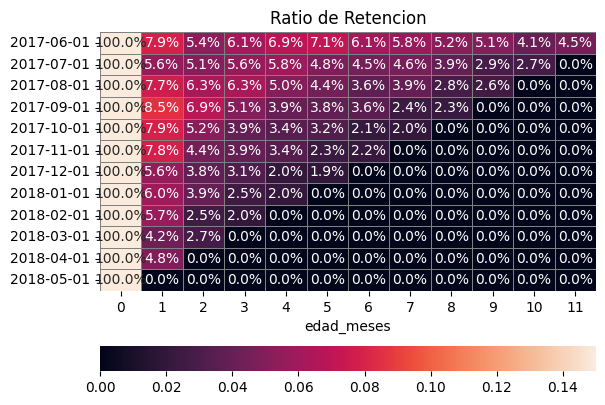

In [37]:
plt.Figure(figsize= (20,18))
sns.heatmap(retencion, 
            annot=True, 
            fmt='.1%', 
            linewidths=0.5, 
            linecolor='grey', 
            vmax=0.15,
            cbar_kws={'orientation': 'horizontal'}).set(title = 'Ratio de Retencion')
plt.show()

Aqui en la grafica de calor se muestra la retencion y el porcentaje que regresan los clientes en meses  nos damos cuenta que en junio los clientes siguen visitando la pagina desde esa fecha hasta el resto del año sigue visitando la web 

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

En esta parte no es necesario calcular un tiempo en que vuelven los usuarios. Una forma más simple de ver cuántos usuarios vuelven es determinar el styckiness factor semanal y mensual, los cuales se calculan como DAU/WAU y DAU/MAU

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Ok, ahora el resultado de la parte anterior es correcto. Muy bien al calcular este tipo de retención, es el más completo. Nota que las cohortes más nuevas tienen peor retención en el tiempo

</div>

<div class="alert alert-block alert-info">
<b>Me faltaba mucho por hacer en la parte que me dejo este comentario aparte de que fue el ultimo lo baje hasta donde estaba usted analisando mi progreso en la revision</b> <a class="tocSkip"></a>
</div>

## Ventas

### ¿Cuándo empieza la gente a comprar?

In [38]:
orders_raw.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [39]:
orders_raw['dia_compras']= orders_raw['buy_ts'].dt.date


In [40]:
orders_raw['mes_compra']= orders_raw['buy_ts'].apply(lambda fecha: pd.to_datetime(fecha.strftime('%Y-%m-%01')))

In [41]:
orders_raw

,buy_ts,revenue,uid,dia_compras,mes_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01


In [42]:
primeras_compras = orders_raw.groupby('uid')['buy_ts'].min().reset_index()

In [43]:
primeras_compras.columns = ['uid','primera_compra_ts']

In [44]:
primeras_compras['primera_compra_dia']= primeras_compras['primera_compra_ts'].dt.date

In [45]:
primeras_compras['primera_compra_mes']= primeras_compras['primera_compra_dia'].apply(lambda fecha: pd.to_datetime(fecha.strftime('%Y-%m-%01')))

In [46]:
primeras_compras

,uid,primera_compra_ts,primera_compra_dia,primera_compra_mes
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09-01
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03-01
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02-01


In [47]:
compradores =pd.merge(primeras_visitas, primeras_compras, how='inner',on= 'uid')

In [48]:
compradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   uid                       36523 non-null  uint64        
 1   inicio_ts_primera_sesion  36523 non-null  datetime64[ns]
 2   primera_sesion_dias       36523 non-null  object        
 3   primera_sesion_mes        36523 non-null  datetime64[ns]
 4   primera_compra_ts         36523 non-null  datetime64[ns]
 5   primera_compra_dia        36523 non-null  object        
 6   primera_compra_mes        36523 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(2), uint64(1)
memory usage: 2.0+ MB


In [49]:
compradores['dias_a_la_primera_compra']= ((compradores['primera_compra_ts']-compradores['inicio_ts_primera_sesion'])/np.timedelta64(1, 'D')).astype('int')
compradores

,uid,inicio_ts_primera_sesion,primera_sesion_dias,primera_sesion_mes,primera_compra_ts,primera_compra_dia,primera_compra_mes,dias_a_la_primera_compra
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0
...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,95
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103


##### Dias en ser clientes 
La gente vuelve a comprar desde el primer dia, muy poca gente tarda mas de 50 dias en volver a comprar desde su primera compra.

En esta tabla mostramos que tiempo dura en dias de la primera compra a la ultima fecha de compra hay unos que marcan horas lo cual no se tomo en cuenta, se tomo los datos en dias 

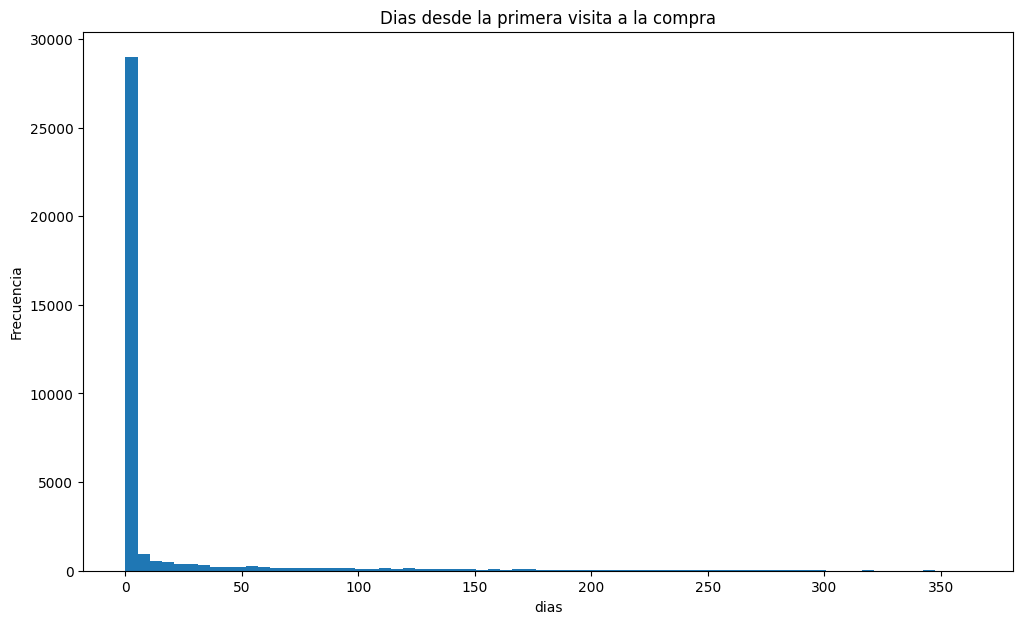

In [50]:
compradores['dias_a_la_primera_compra'].plot(kind='hist', bins=70, figsize=(12,7)).set(title='Dias desde la primera visita a la compra', xlabel='dias', ylabel='Frecuencia')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Correcto! Muy bien, el punto clave es hacer directamente el merge de primeras visitas a primeras ordenes.

</div>

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [51]:
tamano_cohortes = compradores.groupby('primera_compra_mes')['uid'].nunique().reset_index()
tamano_cohortes.columns = ['primera_compra_mes', 'total_compradores']

In [52]:
cohortes =pd.merge(orders_raw, compradores, how='inner', on= 'uid'
                    ).groupby(['primera_compra_mes', 'mes_compra']
                    ).agg({'revenue': 'sum'}
                    ).reset_index()

In [53]:
cohortes

,primera_compra_mes,mes_compra,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


##### Pedidos de Cada Periodo

En la tabla anterior se muestra la los pedidos o ganancia que hay al mes desde la primer compra hasta que termina el mes.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Para esta pregunta debes calcular la cantidad de pedidos, no la ganancia. Puedes obtener el total de pedidos por mes para tener una representación de lo que ocurre en la data.

</div>

<div class="alert alert-block alert-info">

<b>Listo ya hice el analis de Total de pedidos por mes </b> <a class="tocSkip"></a>
</div>

In [54]:
# Asegurar que buy ts es de tipo datetime
orders_raw['buy_ts'] = pd.to_datetime(orders_raw['buy_ts'])

# Agrupar por mes y contar la cantidad de pedidos
orders_by_month = orders_raw.groupby(orders_raw['buy_ts'].dt.to_period('M')).size().reset_index(name='total orders')

orders_by_month


,buy_ts,total orders
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


En la tabla anterior visualizamos cuantas fueron el total de ordenes (pedidos) al mes 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Correcto!

</div>

#### ¿Cuál es el tamaño promedio de compra?

In [55]:
cohortes['edad_mes']= ((cohortes['mes_compra']-cohortes['primera_compra_mes'])/ (30* np.timedelta64(1, 'D'))).round().astype('int')

cohortes.columns = ['primera_compra_mes','mes_compra', 'revenue', 'edad_mes']

In [56]:
cohortes_reporte = pd.merge(tamano_cohortes, cohortes, how='inner', on='primera_compra_mes')

In [57]:
cohortes_reporte['revenue_por_comprador']= cohortes_reporte['revenue']/cohortes_reporte['total_compradores']
cohortes_reporte

,primera_compra_mes,total_compradores,mes_compra,revenue,edad_mes,revenue_por_comprador
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


##### El promedio por comprador 
En la tabla anterior se muestra el promedio de cada comprador en la columna "revenue_por_comprador"


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Buen trabajo con la generación de la data, pero me parece que se podría mostrar de mejor forma, como por ejemplo con una tabla pivote que muestre para cada cohorte el promedio de revenue a medida que avanza la edad de cada cohorte

</div>

#### ¿Cuánto dinero traen? (LTV)

In [58]:
cohortes_ltv_raw = cohortes_reporte.pivot_table(
    index='primera_compra_mes',
    columns='edad_mes',
    values= 'revenue_por_comprador',
    aggfunc='sum',)

cohortes_ltv_raw

edad_mes,0,1,2,3,4,5,6,7,8,9,10,11
primera_compra_mes,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


por ordenes acumulativas se ocupo .cumsum()

In [59]:
cohortes_ltv = cohortes_reporte.pivot_table(
    index='primera_compra_mes',
    columns='edad_mes',
    values= 'revenue_por_comprador',
    aggfunc='sum',).cumsum(axis=1)

In [60]:
cohortes_ltv

edad_mes,0,1,2,3,4,5,6,7,8,9,10,11
primera_compra_mes,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
cohortes_ltv= cohortes_ltv.round(2).fillna(0)
cohortes_ltv.index = cohortes_ltv.index.astype(str)
cohortes_ltv

edad_mes,0,1,2,3,4,5,6,7,8,9,10,11
primera_compra_mes,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,0.00
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,0.00,0.00
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,0.00,0.00,0.00
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,0.00,0.00,0.00,0.00
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,0.00,0.00,0.00,0.00,0.00
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,4.14,4.43,4.73,4.88,4.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,4.16,4.44,4.51,4.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


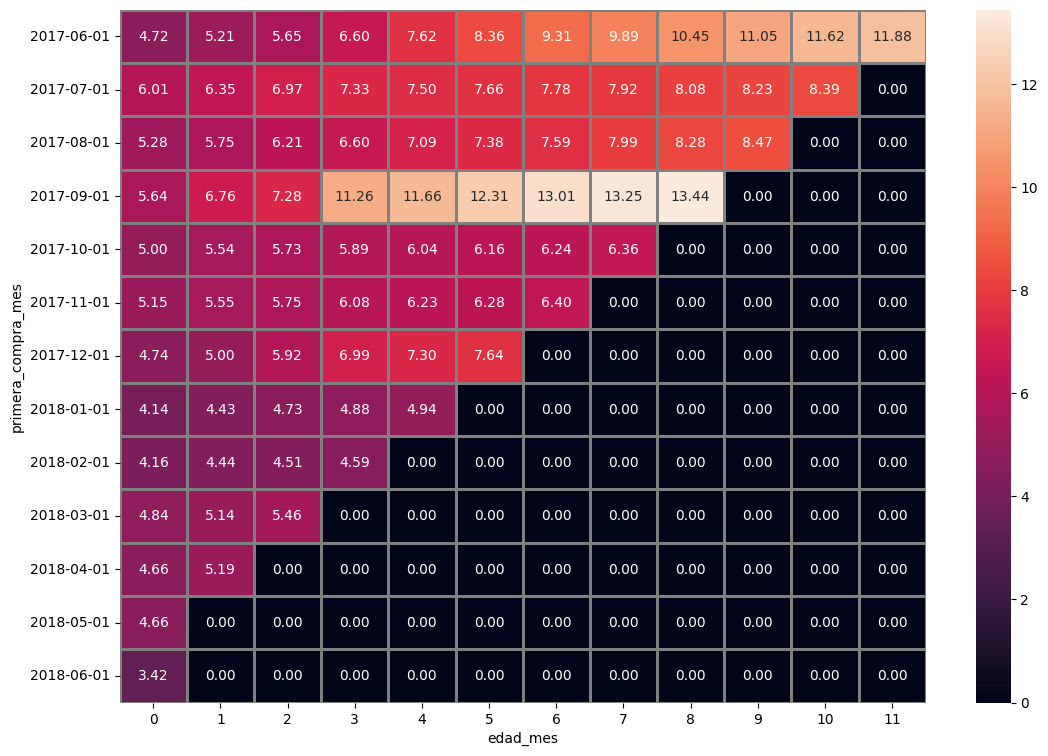

In [62]:
plt.figure(figsize=(13,9))
sns.heatmap(
    cohortes_ltv,
    annot=True,
    fmt='.2f',
    linewidths=1, 
    linecolor ='grey',
)

plt.show()

##### En la grafica de calor vemos cuanto es la ganancia acumulada y los meses con los dias de mayor ganancia.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Excelente! Muy bien con este resultado, nos muestra la generación de valor de cada cohorte.

</div>

## Marketing

 ### 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [63]:
# Asegurar que la columna de fecha es de tipo datetime
cost_raw['dt'] = pd.to_datetime(cost_raw['dt'])

#  Calcular el gasto total
total_cost = cost_raw['costs'].sum()

#  Calcular el gasto por fuente de adquisición
cost_by_source = cost_raw.groupby('source_id')['costs'].sum().sort_values(ascending=False).reset_index()

#  Calcular el gasto a lo largo del tiempo (por día, mes o año)
cost_by_date = cost_raw.groupby(cost_raw['dt'].dt.to_period('M'))['costs'].sum().reset_index()

# Mostrar los resultados
print(f"Total gastado: {total_cost}")
print('----------------------------------')
print("\nGasto por fuente de adquisición:")
print(cost_by_source)
print('----------------------------------')
print("\nGasto a lo largo del tiempo:")
print(cost_by_date)



Total gastado: 329131.62
----------------------------------

Gasto por fuente de adquisición:
   source_id      costs
0          3  141321.63
1          4   61073.60
2          5   51757.10
3          2   42806.04
4          1   20833.27
5         10    5822.49
6          9    5517.49
----------------------------------

Gasto a lo largo del tiempo:
         dt     costs
0   2017-06  18015.00
1   2017-07  18240.59
2   2017-08  14790.54
3   2017-09  24368.91
4   2017-10  36322.88
5   2017-11  37907.88
6   2017-12  38315.35
7   2018-01  33518.52
8   2018-02  32723.03
9   2018-03  30415.27
10  2018-04  22289.38
11  2018-05  22224.27


/var/folders/20/2__1c8y56qnb6vtl8__m86_h0000gn/T/ipykernel_76319/604277344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cost_by_source['source_id'], y=cost_by_source['costs'], palette="Blues_r")


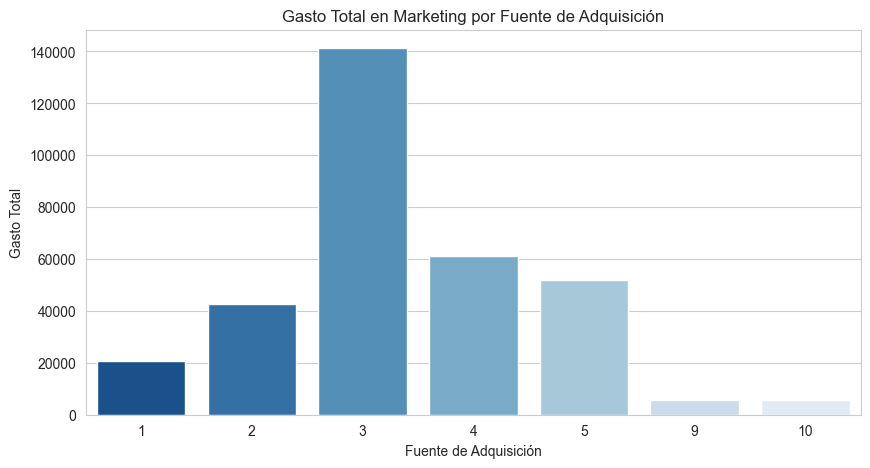

In [64]:
sns.set_style("whitegrid")

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=cost_by_source['source_id'], y=cost_by_source['costs'], palette="Blues_r")

# Etiquetas
plt.xlabel("Fuente de Adquisición")
plt.ylabel("Gasto Total")
plt.title("Gasto Total en Marketing por Fuente de Adquisición")

# Mostrar gráfico
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Correcto, aunque este tipo de información es mucho mejor ponerla en un gráfico.

</div>

<div class="alert alert-block alert-info">
<b>Listo la grafica.</b> <a class="tocSkip"></a>
</div>

### 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [65]:
# Asegurar que las fechas son tipo datetime
cost_raw['dt'] = pd.to_datetime(cost_raw['dt'])

# Calcular el gasto total en marketing por fuente
cost_by_source = cost_raw.groupby('source_id')['costs'].sum().reset_index()

# Contar la cantidad de clientes únicos adquiridos por fuente de adquisición
clients_by_source = visitor_raw.groupby('source_id')['uid'].nunique().reset_index()
clients_by_source.rename(columns={'source_id': 'source_id', 'uid': 'unique_clients'}, inplace=True)

# Calcular el Costo de Adquisición de Clientes (CAC)
cac_by_source = cost_by_source.merge(clients_by_source, on='source_id', how='left')
cac_by_source['CAC'] = cac_by_source['costs'] / cac_by_source['unique_clients']

print(cac_by_source)


   source_id      costs  unique_clients       CAC
0          1   20833.27           18999  1.096546
1          2   42806.04           26245  1.631017
2          3  141321.63           74756  1.890439
3          4   61073.60           83525  0.731201
4          5   51757.10           56974  0.908434
5          9    5517.49            9264  0.595584
6         10    5822.49            8067  0.721766


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

En esta parte el CAC está calculado incorrectamente. El CAC es el costo de adquisición de los usuarios, para esto debes tener los usuarios adquiridos (que hicieron al menos una compra) y la fuente por la que fueron adquiridos (fuente de su primera visita).
    
La inversión de marketing es variable según el día y la fuente, de la misma forma que el ingreso de usuarios varia por día y fuente. Debes juntar el gasto de mkt por día y fuente con la cantidad de usuarios compradores que fueron obtenidos por esa fuente. Con ello obtienes un cac para cada día y fuente, luego puedes agrupar por fuente y obtener un promedio del cac diario. Te dejo un esquema de cómo realizar esto.
    
- Para cada usuario debes tener la fuente de la primera visita y la fecha de la primera compra
- Agrupa lo anterior por fuente y fecha para contar la cantidad diferente de compradores
- A lo anterior une los costos por fecha y fuente.
- El cac diario es el costo del día, dividido la cantidad de compradores
- Obtén un cac por fuente: agrupa los cac diarios por fuente y obtén el promedio como el cac por fuente   
</div>

In [66]:
cohortes_reporte

,primera_compra_mes,total_compradores,mes_compra,revenue,edad_mes,revenue_por_comprador
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [67]:
cohortes_ltv

edad_mes,0,1,2,3,4,5,6,7,8,9,10,11
primera_compra_mes,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,0.00
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,0.00,0.00
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,0.00,0.00,0.00
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,0.00,0.00,0.00,0.00
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,0.00,0.00,0.00,0.00,0.00
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,4.14,4.43,4.73,4.88,4.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,4.16,4.44,4.51,4.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


/var/folders/20/2__1c8y56qnb6vtl8__m86_h0000gn/T/ipykernel_76319/4219138056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_id', y='CAC', data=cac_by_source, palette='Blues_r')


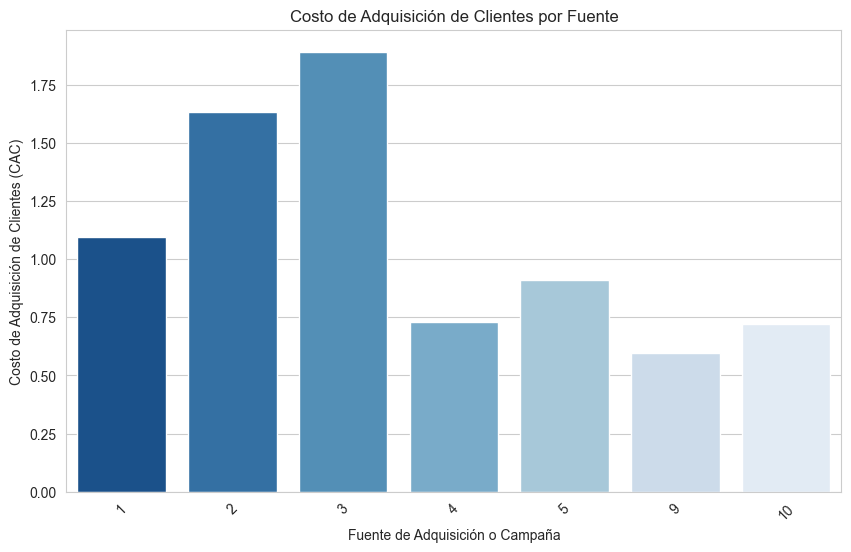

In [68]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='CAC', data=cac_by_source, palette='Blues_r')

# Agregar etiquetas y título
plt.xlabel('Fuente de Adquisición o Campaña')
plt.ylabel('Costo de Adquisición de Clientes (CAC)')
plt.title('Costo de Adquisición de Clientes por Fuente')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

1. Costo de Adquisición de Clientes (CAC)

Fuente 3 muestra el CAC más alto, lo que indica que adquirir clientes a través de esta fuente es significativamente más costoso que otras.
Las fuentes 1 y 2 tienen un CAC relativamente más bajo, siendo la Fuente 1 la más efectiva en términos de costos por adquisición.

### 3. ¿Cuán rentables eran las inversiones? (ROMI)

In [69]:
# Convertir las fechas a datetime
orders_raw['buy_ts'] = pd.to_datetime(orders_raw['buy_ts'])
visitor_raw['start_ts'] = pd.to_datetime(visitor_raw['start_ts'])

# Unir orders_raw con visitor_raw para obtener source_id en los pedidos
orders_merged = orders_raw.merge(visitor_raw[['uid', 'source_id']], on='uid', how='left')

# Calcular ingresos por fuente de adquisición
revenue_by_source = orders_merged.groupby('source_id')['revenue'].sum().reset_index()

# Calcular costos de marketing por fuente
cost_by_source = cost_raw.groupby('source_id')['costs'].sum().reset_index()

# Calcular ROMI
romi_by_source = cost_by_source.merge(revenue_by_source, on='source_id', how='left')
romi_by_source['ROMI'] = (romi_by_source['revenue'] - romi_by_source['costs']) / romi_by_source['costs']

# Mostrar resultados
print(romi_by_source)

   source_id      costs     revenue        ROMI
0          1   20833.27  2298200.17  109.313944
1          2   42806.04  2638189.21   60.631237
2          3  141321.63   296687.96    1.099381
3          4   61073.60   496690.17    7.132649
4          5   51757.10  1181477.14   21.827344
5          9    5517.49    36342.25    5.586736
6         10    5822.49    14619.23    1.510821


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

El ROMI depende del ltv y del cac, ya que queremos ver la rentabilidad de acuerdo al valor acumulado de la vida de los usuarios y el costo de haberlos traido. Para cada fuente, con solo sus usuarios que entraron a través de dicha fuente, calculas el ltv y el cac. Luego efectivamente el romi puede ser ltv/cac.
 
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Te orientaré para esta parte:
    
- Debes tener para cada usuario su source de primera visita, mes de primera compra y todas sus compras. Es decir, una tabla con una fila para cada compra y en cada fila tener el source de la 1era visita y mes de 1era compra del usuario correspondiente.
   - Este primer dataframe lo puedes construir obteniendo la primera visita de cada usuario, eso te da la source de la primera visita
   - Luego obtén la fecha de primera compra para cada usuario
   - Haz un par de left joins para unir esta data a orders, así tendrás lo requerido
  
    
- Debes iterar sobre las source. 
  - Supongamos estamos iterando sobre la source i.
  - Filtra la tabla por la source i, de manera que solamente te quedan los usuarios que llegaron por la source i.
  - Con esta data filtrada, calcular el tamaño inicial de cada cohorte y por otro lado, el revenue por mes de cada cohorte (hay que agregar la edad si aún no estaba calculada)
  - Con eso calculamos un revenue por comprador de cada mes para cada cohorte
  - Además, obtén los costos mensuales de la source i y únelos como mes de primera orden = mes de gasto
  - Así, tendremos ltv=revenue/tamaño cohorte y cac=gasto/tamaño cohorte
  - Finalmente ROMI = ltv/cac
  - Presenta esto en una tabla pivote, similara como se presentó el ltv
    
</div>

/var/folders/20/2__1c8y56qnb6vtl8__m86_h0000gn/T/ipykernel_76319/992619885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_id', y='ROMI', data=romi_by_source, palette='Blues_r')


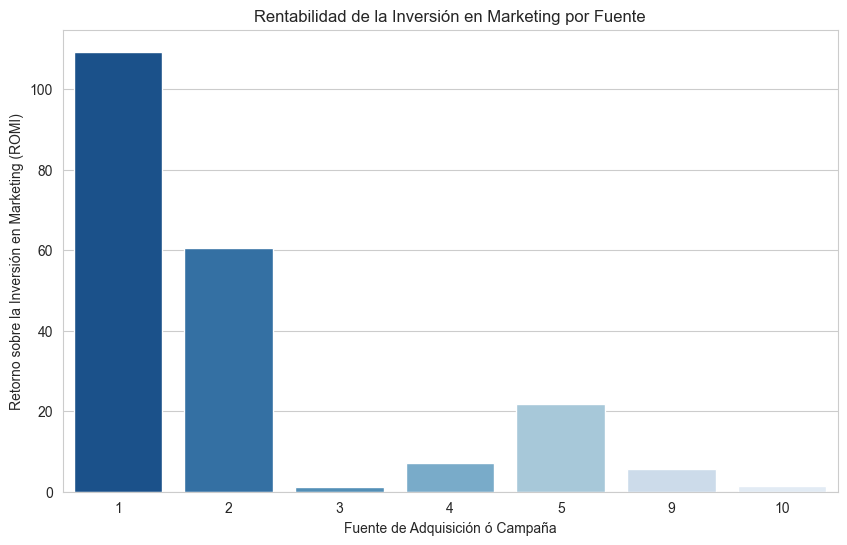

In [70]:
# Ordenar de mayor a menor ROMI
romi_by_source = romi_by_source.sort_values(by='ROMI', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='ROMI', data=romi_by_source, palette='Blues_r')

# Etiquetas y título
plt.xlabel('Fuente de Adquisición ó Campaña')
plt.ylabel('Retorno sobre la Inversión en Marketing (ROMI)')
plt.title('Rentabilidad de la Inversión en Marketing por Fuente')

# Mostrar gráfico
plt.show()


2. Rentabilidad sobre la Inversión en Marketing (ROMI)

Fuente 1 es la más destacada en cuanto a rentabilidad. Tiene un ROMI extremadamente alto, lo que indica que cada dólar invertido en esta fuente genera un retorno muy positivo.
Fuente 2 también muestra un ROMI decente, aunque significativamente más bajo que la fuente 1.

 # Conclusión
 


Recomendación:

Fuente 1 es la mejor opción para recomendar, ya que ofrece el mejor ROMI y tiene un bajo CAC, lo que significa que está generando un excelente retorno por cada peso invertido, mientras mantiene los costos bajos.
A pesar de que los gastos de marketing en la fuente 1 pueden ser más altos en términos absolutos, los beneficios en términos de ingresos superan con creces los gastos, lo que la convierte en la opción más rentable.
Por qué elegir la Fuente 1:

Alta rentabilidad: Un ROMI elevado demuestra que esta fuente de adquisición está generando más ingresos que los costos.
Costo relativamente bajo en comparación con la rentabilidad obtenida.


En resumen, Fuente 1 debe ser priorizada, mientras que las demás fuentes podrían revisarse para optimizar el gasto y mejorar el CAC.


Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

En cuanto cuanto se deberia invertir se podria inverir la cantidad que se invirtio en la fuente 3 ya que fue la mas cara y en la que menos se vio retorno economico esta informacion se esta tomando sobre Gasto por fuente de adquisición de cada fuente. y con la CAC y ROMI



<div class="alert alert-block alert-info">
<b>No se que tomar de dato para sacar la conclusion que me piden se que la las visitas en la web entran mas con equipos de computo y la fuente o campaña la mejor es la #4 y tengo varias metricas mas pero no se con cual determinar cuanto dinero y donde invertir solo se que invertir seria en equipos de computo y campaña o fuente #4 pero con forme de cuanto dinero no se que metricas ocupar o como hacer mi analisis no se si me podrian apoyar en que visualizar para hacer mi conclusion saludos..</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Esto debes determinarlo con las siguientes partes, donde evaluas el costo del marketing, la cantidad de usuarios que trae la inversión de cada fuente y finalmente el retorno en la inversión sobre cada fuente

</div>